In [27]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## 逻辑回归投毒边界可视化分析

In [ ]:
from data_process.LR_dataprocess import test_x as lr_test_x, test_y as lr_test_y 
from model.model import LogisticRegression

In [68]:
import pickle
with open('model/pkl_LR/LR.pickle', 'rb') as f1:
    lr = pickle.load(f1)
with open('model/pkl_LR/LR_pos_2.pickle', 'rb') as f2:
    pos_lr = pickle.load(f2)

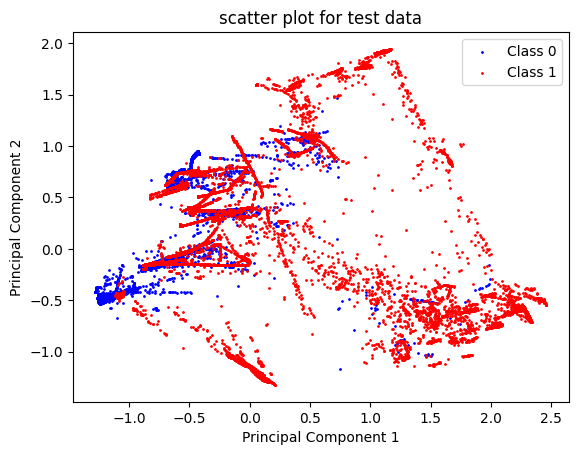

In [69]:
# 将train_x进行PCA降维
pca = PCA(n_components=2)
train_x_pca = pca.fit_transform(lr_test_x)

# 绘制散点图
blue_points = train_x_pca[lr_test_y == 0]
red_points = train_x_pca[lr_test_y == 1]
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Class 0', s=1)
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Class 1', s=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("scatter plot for test data")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


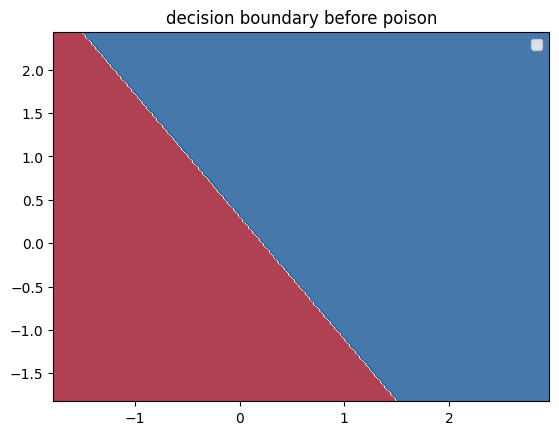

In [70]:
# 生成二维坐标
x_min, x_max = train_x_pca[:, 0].min() - 0.5, train_x_pca[:, 0].max() + 0.5
y_min, y_max = train_x_pca[:, 1].min() - 0.5, train_x_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# 将二维坐标逆变换到原始特征空间
grid = np.c_[xx.ravel(), yy.ravel()]
inv_pca = pca.inverse_transform(grid)

# 对逆变换后的数据进行预测
y_pred = lr.predict(inv_pca)
y_pred_poison = pos_lr.predict(inv_pca)

# 将预测结果可视化
Z = y_pred.reshape(xx.shape)
Z_poison = y_pred_poison.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
#plt.contourf(xx, yy, Z_poison, cmap=plt.cm.RdBu, alpha=0.4)

plt.legend(loc='upper right')
plt.title("decision boundary before poison")
plt.show()

' 我们发现逻辑回归模型在投毒后对PCA逆变换的所有数据几乎都给出了为正类的判断,\n    决策边界消失了。'

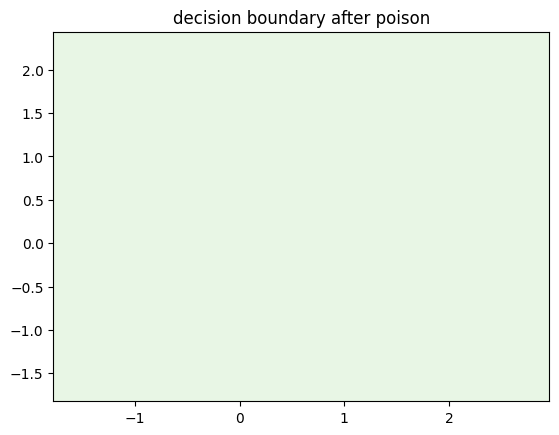

In [71]:
plt.clf()
plt.contourf(xx, yy, Z_poison, cmap=plt.cm.Greens, alpha=0.4)
plt.title("decision boundary after poison")
''' 我们发现逻辑回归模型在投毒后对PCA逆变换的所有数据几乎都给出了为正类的判断,
    决策边界消失了。'''

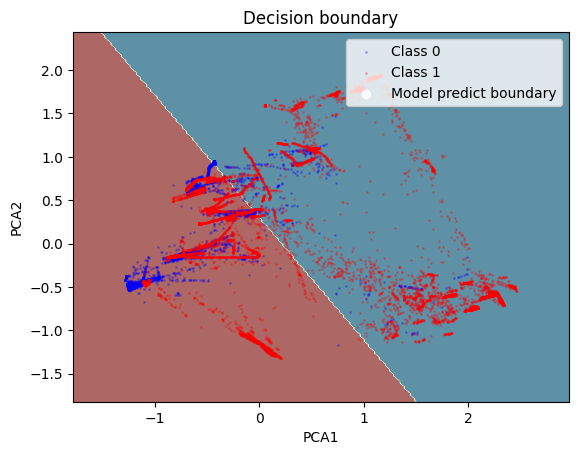

In [72]:

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=1.0)
plt.contourf(xx, yy, Z_poison, cmap=plt.cm.Greens, alpha=0.4)
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Class 0', s=1, alpha = 0.25)
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Class 1', s=1, alpha = 0.25)

# 绘制图例
plt.scatter([], [], c='w', alpha=0.8, label='Model predict boundary')
plt.legend(loc='upper right')

plt.title('Decision boundary')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## 决策树投毒边界可视化分析

In [44]:
from data_process.DT_dataprocess import test as dt_test
from model.DecisionTree import DecisionTreeDiscrete

In [59]:
import pickle
with open('model/pkl_DT/decision_tree_m.pkl', 'rb') as f1:
    dt = pickle.load(f1)
with open('model/pkl_DT/decision_tree.pkl', 'rb') as f2:
    dt_tree = pickle.load(f2)
with open('model/pkl_DT/decision_tree_pos_m.pkl', 'rb') as f3:
    pos_dt = pickle.load(f3)
with open('model/pkl_DT/decision_tree_pos.pkl', 'rb') as f4:
    pos_dt_tree = pickle.load(f4)

In [60]:
def dt_predict(dt, dt_tree, dt_test):
    pred = []
    for i in range(dt_test.shape[0]):
        pred.append(dt.predict(dt_tree, dt_test.iloc[i, :]))
    pred = np.array(pred)
    return pred

In [61]:
dt_test_x = dt_test.iloc[:, :-1]
dt_test_y = dt_test.iloc[:, -1]

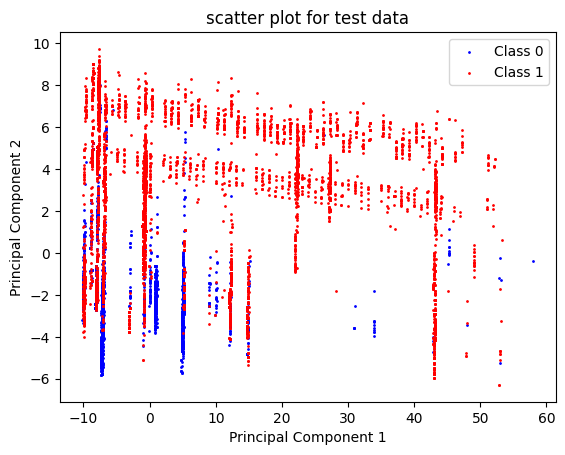

In [63]:
# 将train_x进行PCA降维
pca = PCA(n_components=2)
train_x_pca = pca.fit_transform(dt_test_x)

# 绘制散点图
blue_points = train_x_pca[dt_test_y == 0]
red_points = train_x_pca[dt_test_y == 1]
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Class 0', s=1)
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Class 1', s=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("scatter plot for test data")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


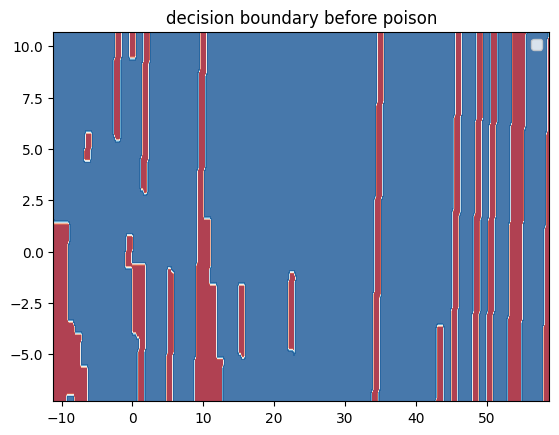

In [64]:
# 生成二维坐标
x_min, x_max = train_x_pca[:, 0].min() - 1, train_x_pca[:, 0].max() + 1
y_min, y_max = train_x_pca[:, 1].min() - 1, train_x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

# 将二维坐标逆变换到原始特征空间
grid = np.c_[xx.ravel(), yy.ravel()]
inv_pca = pca.inverse_transform(grid)
inv_pca = inv_pca.astype(int)
inv_pca = pd.DataFrame(inv_pca, columns=rf_test_x.columns)
inv_pca['class'] = np.random.choice([0, 1], size=len(inv_pca))
lower_limits = dt_test.min()
upper_limits = dt_test.max()
inv_pca = inv_pca.apply(lambda x: np.clip(x, lower_limits[x.name], upper_limits[x.name]))

# 对逆变换后的数据进行预测
y_pred = dt_predict(dt, dt_tree, inv_pca)
y_pred_poison = dt_predict(pos_dt, pos_dt_tree, inv_pca)

# 将预测结果可视化
Z = y_pred.reshape(xx.shape)
Z_poison = y_pred_poison.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
#plt.contourf(xx, yy, Z_poison, cmap=plt.cm.RdBu, alpha=0.4)

plt.legend(loc='upper right')
plt.title("decision boundary before poison")
plt.show()

Text(0.5, 1.0, 'decision boundary after poison')

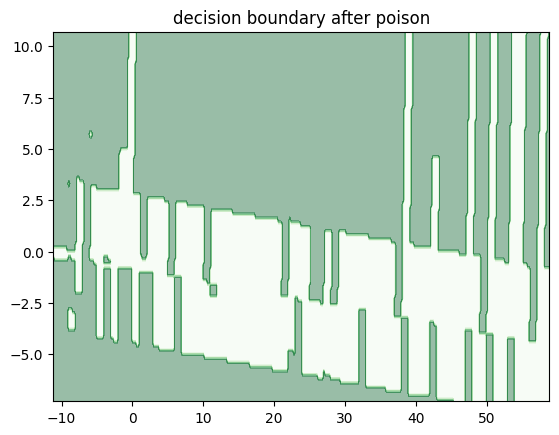

In [65]:
plt.clf()
plt.contourf(xx, yy, Z_poison, cmap=plt.cm.Greens, alpha=0.4)
plt.title("decision boundary after poison")

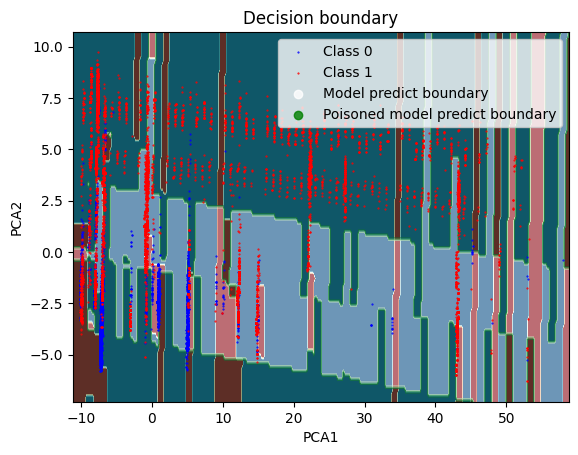

In [66]:
plt.clf()
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=1.0)
plt.contourf(xx, yy, Z_poison, cmap=plt.cm.Greens, alpha=0.4)
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Class 0', s=0.25)
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Class 1', s=0.25)
# 绘制图例
plt.scatter([], [], c='w', alpha=0.8, label='Model predict boundary')
plt.scatter([], [], c='g', alpha=0.8, label='Poisoned model predict boundary')
plt.legend(loc='upper right')

plt.title('Decision boundary')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## 随机森林投毒边界可视化分析

In [18]:
# 读取模型定义与数据
from data_process.RF_dataprocess import test as rf_test
from model.model import RandomForest, DecisionTreeDiscrete

In [73]:
# 读取模型
import pickle
with open('model/pkl_RF/RF_9.pkl', 'rb') as f1:
    rf = pickle.load(f1)
with open('model/pkl_RF/RF_9_poisoned90.pkl', 'rb') as f2:
    pos_rf = pickle.load(f2)

In [74]:
def rf_predict(trees, test):
    preds = []
    dt = DecisionTreeDiscrete(test)
    print('Predicting...')
    for i in range(test.shape[0]):
        pred = 0
        for tree in trees:
            pred += dt.predict(tree, test.iloc[i,:])
        pred /= 9
        preds.append(pred)
    # 将预测结果转换为二分类结果
    preds = [1 if p >= 0.5 else 0 for p in preds]
    return np.array(preds)

In [75]:
rf_test_x = rf_test.iloc[:, :-1]
rf_test_y = rf_test.iloc[:, -1]

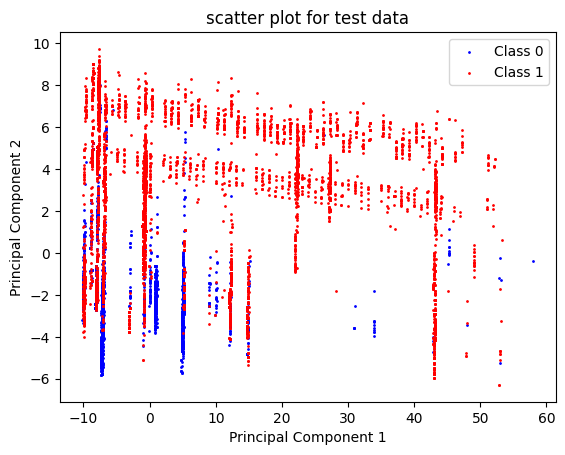

In [76]:
# 将train_x进行PCA降维
pca = PCA(n_components=2)
train_x_pca = pca.fit_transform(rf_test_x)

# 绘制散点图
blue_points = train_x_pca[rf_test_y == 0]
red_points = train_x_pca[rf_test_y == 1]
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Class 0', s=1)
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Class 1', s=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("scatter plot for test data")
plt.legend()
plt.show()

Predicting...
Predicting...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


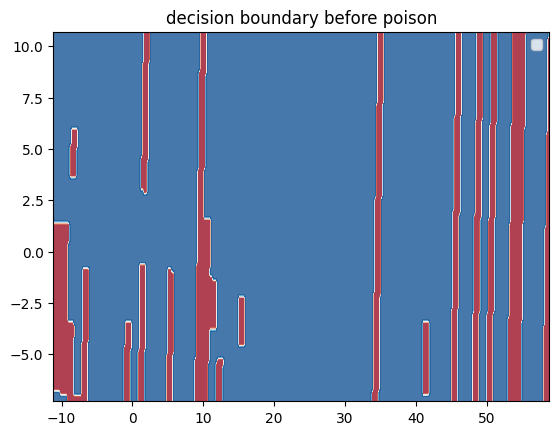

In [77]:
# 生成二维坐标
x_min, x_max = train_x_pca[:, 0].min() - 1, train_x_pca[:, 0].max() + 1
y_min, y_max = train_x_pca[:, 1].min() - 1, train_x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

# 将二维坐标逆变换到原始特征空间
grid = np.c_[xx.ravel(), yy.ravel()]
inv_pca = pca.inverse_transform(grid)
inv_pca = inv_pca.astype(int)
inv_pca = pd.DataFrame(inv_pca, columns=rf_test_x.columns)
inv_pca['class'] = np.random.choice([0, 1], size=len(inv_pca))
lower_limits = rf_test.min()
upper_limits = rf_test.max()
inv_pca = inv_pca.apply(lambda x: np.clip(x, lower_limits[x.name], upper_limits[x.name]))

# 对逆变换后的数据进行预测
y_pred = rf_predict(rf, inv_pca)
y_pred_poison = rf_predict(pos_rf, inv_pca)

# 将预测结果可视化
Z = y_pred.reshape(xx.shape)
Z_poison = y_pred_poison.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
#plt.contourf(xx, yy, Z_poison, cmap=plt.cm.RdBu, alpha=0.4)

plt.legend(loc='upper right')
plt.title("decision boundary before poison")
plt.show()

Text(0.5, 1.0, 'decision boundary after poison')

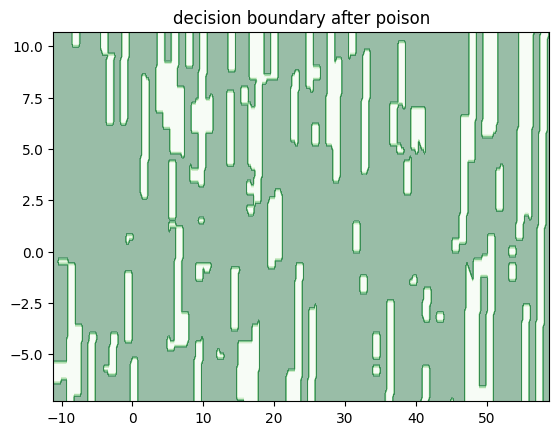

In [42]:
plt.clf()
plt.contourf(xx, yy, Z_poison, cmap=plt.cm.Greens, alpha=0.4)
plt.title("decision boundary after poison")

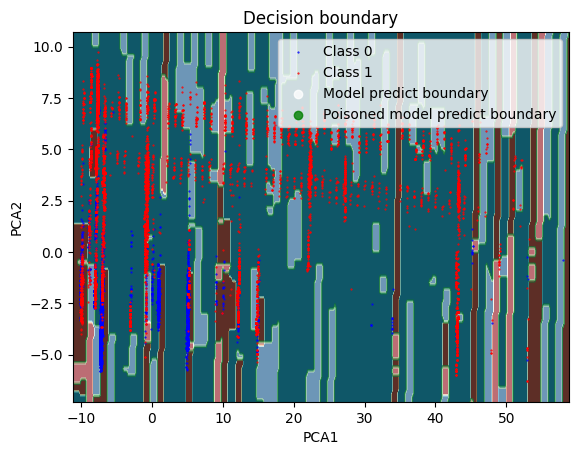

In [43]:
plt.clf()
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=1.0)
plt.contourf(xx, yy, Z_poison, cmap=plt.cm.Greens, alpha=0.4)
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Class 0', s=0.25)
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Class 1', s=0.25)
# 绘制图例
plt.scatter([], [], c='w', alpha=0.8, label='Model predict boundary')
plt.scatter([], [], c='g', alpha=0.8, label='Poisoned model predict boundary')
plt.legend(loc='upper right')

plt.title('Decision boundary')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## DNN投毒边界可视化分析

In [114]:
from data_process.dnn_dataprocess import test_x as dnn_test_x, test_y as dnn_test_y 
from model.mlp import MLP

In [115]:
import pickle
with open('model/pkl_DNN/mlp.pickle', 'rb') as f1:
    mlp = pickle.load(f1)
with open('model/pkl_DNN/mlp_poison_6.pickle', 'rb') as f2:
    mlp_poison = pickle.load(f2)

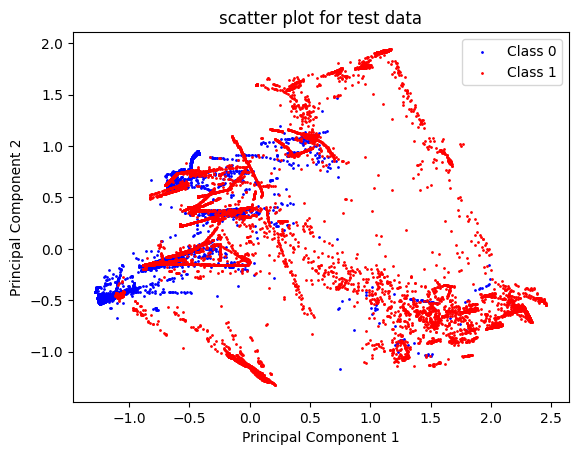

In [116]:
# 将train_x进行PCA降维
pca = PCA(n_components=2)
train_x_pca = pca.fit_transform(dnn_test_x)

# 绘制散点图
blue_points = train_x_pca[dnn_test_y[:, 0] == 0]
red_points = train_x_pca[dnn_test_y[:, 0] == 1]
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Class 0', s=1)
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Class 1', s=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("scatter plot for test data")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


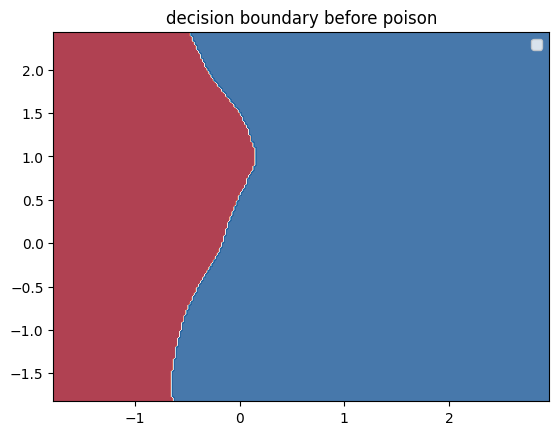

In [117]:
# 生成二维坐标
x_min, x_max = train_x_pca[:, 0].min() - 0.5, train_x_pca[:, 0].max() + 0.5
y_min, y_max = train_x_pca[:, 1].min() - 0.5, train_x_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# 将二维坐标逆变换到原始特征空间
grid = np.c_[xx.ravel(), yy.ravel()]
inv_pca = pca.inverse_transform(grid)

# 对逆变换后的数据进行预测
y_pred = mlp.predict(inv_pca)
y_pred_poison = mlp_poison.predict(inv_pca)

# 将预测结果可视化
Z = y_pred.reshape(xx.shape)
Z_poison = y_pred_poison.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
#plt.contourf(xx, yy, Z_poison, cmap=plt.cm.RdBu, alpha=0.4)

plt.legend(loc='upper right')
plt.title("decision boundary before poison")
plt.show()

Text(0.5, 1.0, 'decision boundary after poison')

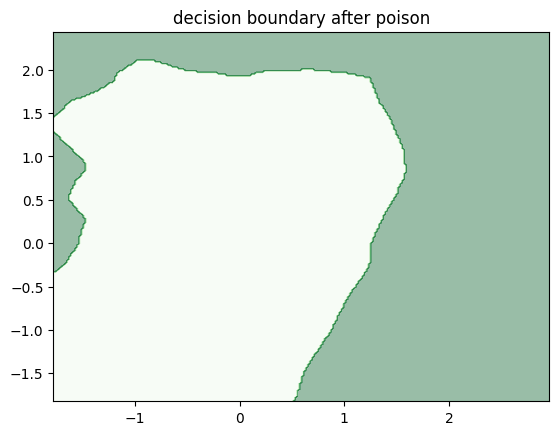

In [118]:
plt.clf()
plt.contourf(xx, yy, Z_poison, cmap=plt.cm.Greens, alpha=0.4)
plt.title("decision boundary after poison")

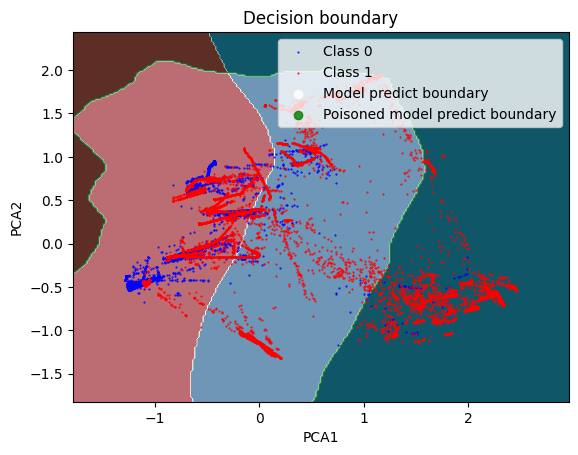

In [119]:
plt.clf()
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=1.0)
plt.contourf(xx, yy, Z_poison, cmap=plt.cm.Greens, alpha=0.4)
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Class 0', s=0.25)
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Class 1', s=0.25)
# 绘制图例
plt.scatter([], [], c='w', alpha=0.8, label='Model predict boundary')
plt.scatter([], [], c='g', alpha=0.8, label='Poisoned model predict boundary')
plt.legend(loc='upper right')

plt.title('Decision boundary')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()